# Quantified Self Apple Health Data  👩🏻‍⚕️
Harshika Jain<br>
Interactive Data Science Byte 3B<br>
Professors: John Stamper, Erik Harpstead<br>
***

## Assessing the 4C's of data quality
### Complete . Coherent . Correct . aCcountable AWARE data
We were required to collect data using AWARE and then analyze it, however the data collected did not meet all the 4C's of data quality in my case. I had switched multiple sensors on (about 20), but only 5 of them gave me some data which include batter_charges, battery_discharges, mqtt_history, plugin_ios_pedometer and screen. The number of rows in each of these were 17, 16, 0, 712 and 813 respectively. 
* Complete: The data was not complete in terms of the information I wanted to gather. Some sensor information was missing. I was hoping to collect more data, along with lat, long information but that didn't work out. 
* Coherent: The data was not coherent to me, maybe it would have made more sense to make it more coherent had I collected more data from other sensors or perhaps I am not skilled enough yet for that. In a particular column in a dataset, floors ascended is recorded, and I would anticipate the value to be around 5-6 but the value there is more than a million. 
* Correct: The data was correct for sure. Only further inspection could have told me about anomalies, or if it had been gathered in a wrong manner.
* Accountable: It was personal data, thus was accountable. 

Thus, I have decided to pivot and use health data exported from my phone and apple watch. That data met the 4C's thus have done data analysis using that.
***

## Ensuring the 4C's of data quality
### Complete . Coherent . Correct . aCcountable Apple Health Data
* Complete: When I was analysing my stepcount in the Apple Health Data, the data was coming from 2 sources, i.e. Apple Watch and my Phone and I saw very spiked values of my steps taken since I started wearing my watch. This made me go back and only isolate the stepcount based on my phone. Later on this led to plotting a graph which is better representative of the dataset.
* Coherent: Using the apple-health-data-parser which I found, I was able to convert XML data to CSV, thus making it coherent, and readable by Jupyter Notebooks. The data when converted to .csv format did not have any missing values and it was very understandable. 
* Correct: The sources of error i.e. double counted values were removed to maintain the correctness of data. 
* Accountable: Since I have been using my phone for a while and not someone else, I was assured that the data collected is accountable. 
***

<h2>Parsing Health Data</h2>
<p>Using an apple health data parser found on Github to convert XML data to CSV inside Jupyter Notebook</p>

In [1]:
%run -i 'apple-health-data-parser' 'data/export.xml'

Reading data from data/export.xml . . . done


apple-health-data-parser.py:136: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  self.nodes = self.root.getchildren()


Unexpected node of type ExportDate.

Tags:
ActivitySummary: 94
ExportDate: 1
Me: 1
Record: 171716
Workout: 53

Fields:
HKCharacteristicTypeIdentifierBiologicalSex: 1
HKCharacteristicTypeIdentifierBloodType: 1
HKCharacteristicTypeIdentifierDateOfBirth: 1
HKCharacteristicTypeIdentifierFitzpatrickSkinType: 1
activeEnergyBurned: 94
activeEnergyBurnedGoal: 94
activeEnergyBurnedUnit: 94
appleExerciseTime: 94
appleExerciseTimeGoal: 94
appleStandHours: 94
appleStandHoursGoal: 94
creationDate: 171769
dateComponents: 94
device: 166084
duration: 53
durationUnit: 53
endDate: 171769
sourceName: 171769
sourceVersion: 171571
startDate: 171769
totalDistance: 53
totalDistanceUnit: 53
totalEnergyBurned: 53
totalEnergyBurnedUnit: 53
type: 171716
unit: 165087
value: 171659
workoutActivityType: 53

Record types:
ActiveEnergyBurned: 52555
AppleExerciseTime: 1655
AppleStandHour: 883
BasalEnergyBurned: 21983
BodyMass: 1
DietaryCalcium: 1
DietaryCarbohydrates: 1
DistanceCycling: 7
DistanceWalkingRunning: 39362

## Questions I want to answer about my health 
* ### How has my stepcount changed and varied over time? 👣
* ### What are my exercise levels during the week and during the day? ⛹🏾‍♀️
* ### How consistent has my menstrual cycle been over the months/ years? ❣️  
* ### Is there a relation between heavy menstrual flow and step count? 👣❣️
***

In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pytz
from vega_datasets import data
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## How has my stepcount changed and varied over time? 👣
I want to find this out to see what are my lazy months and active months, and how they are related to my activity in school and at work. 

Converting the data

In [4]:
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/New_York'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_day_of_week = lambda x: convert_tz(x).weekday()

In [47]:
steps = pd.read_csv("data/StepCount.csv")
steps.describe()

value
count  35454.000000
mean     179.497800
std      937.430538
min        1.000000
25%       24.000000
50%       78.000000
75%      211.000000
max    63769.000000

In [48]:
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['month'] = steps['startDate'].map(get_month)

In [52]:
steps['sourceName'].unique()

array(['iPhone', 'Harshika ’s Apple\xa0Watch'], dtype=object)

Selecting count of steps only from iPhone and eliminating data from Apple Watch to prevent double counting.

In [53]:
value_list = ['iPhone']
steps_iphone = steps[steps.sourceName.isin(value_list)]
steps_iphone.head()

sourceName sourceVersion                                             device  \
0     iPhone          10.1  <<HKDevice: 0x281cb41e0>, name:iPhone, manufac...   
1     iPhone          10.1  <<HKDevice: 0x281cb40f0>, name:iPhone, manufac...   
2     iPhone          10.1  <<HKDevice: 0x281cb4410>, name:iPhone, manufac...   
3     iPhone          10.1  <<HKDevice: 0x281cb44b0>, name:iPhone, manufac...   
4     iPhone          10.1  <<HKDevice: 0x281cb4550>, name:iPhone, manufac...   

        type   unit               creationDate                 startDate  \
0  StepCount  count  2016-12-22 06:38:10 -0400 2016-12-22 06:22:53-04:00   
1  StepCount  count  2016-12-22 07:45:09 -0400 2016-12-22 06:29:53-04:00   
2  StepCount  count  2016-12-22 07:45:09 -0400 2016-12-22 07:14:13-04:00   
3  StepCount  count  2016-12-23 04:40:37 -0400 2016-12-23 03:56:22-04:00   
4  StepCount  count  2016-12-23 04:40:37 -0400 2016-12-23 04:06:20-04:00   

                     endDate  value    month  
0  2016-12-22 06:29:53 -0400     23  2016-12  
1  2016-12-22 06:34:11 -0400     85  2016-12  
2  2016-12-22 07:22:48 -0400     95  2016-12  
3  2016-12-23 04:06:20 -0400    104  2016-12  
4  2016-12-23 04:09:52 -0400     41  2016-12

In [50]:
steps_month = steps_iphone.groupby(['month'])['value'].sum().reset_index(name = 'StepCount')

### Plotting Step Count per Month
Data collected since the time I have been using my phone. 

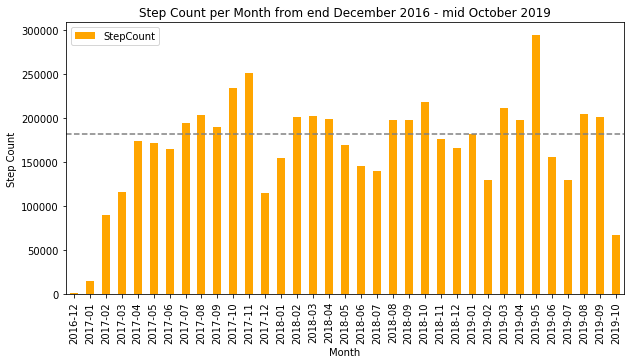

In [51]:
steps_month.plot(x ='month', y = 'StepCount', figsize = [10,5], kind = "bar", color = "orange")
# steps_month.plot(x ='month', y = 'value', figsize = [10,5], kind = "line")
plt.title('Step Count per Month from end December 2016 - mid October 2019')
plt.xlabel("Month")
plt.ylabel("Step Count")
plt.axhline(181826.142857, color='grey', linestyle='--')
plt.show()

### Inference
Since I know where I was during each of the months marked here, I can relate the data to my activity during that month.
* November 2017: I was back to campus in my undergrad wrapping up my Bachelor thesis and was running around all over the city to conduct research, bring material for building prototypes etc. thus the high Step Count. 
* December 2017: I had finished my undergrad studies, and relaxed at home. Also didn't need to take my phone around that much at that time, thus the low Step Count. 
* May 2019: This month has the highest Step Count since I was wrapping up the semester in Pittsburgh, moving my stuff around and also took a 2 week trip, which involved a lot of walking. 
***

## What are my exercise levels during the week and throughout the day? ⛹🏾‍♀️
I wanted to find out what are my peak active timings. This data especially pertaining to active hours throughout the day had chance of being biased since more than half the data was collected in a timezone that is approx 9.5/ 10.5 hours ahead of Pittsburgh. Thus to combat that, I isolated the data using only Apple Watch, which I started using in one timezone for the most part. 

In [32]:
exercise = pd.read_csv("data/ActiveEnergyBurned.csv")
exercise['startDate'] = pd.to_datetime(exercise['startDate'])
exercise['day'] = exercise['startDate'].map(get_day)
exercise['hour'] = exercise['startDate'].map(get_hour)
exercise['dow'] = exercise['startDate'].map(get_day_of_week)
exercise.tail()

sourceName sourceVersion  \
52550  Harshika ’s Apple Watch         5.3.1   
52551  Harshika ’s Apple Watch         5.3.1   
52552  Harshika ’s Apple Watch         5.3.1   
52553  Harshika ’s Apple Watch         5.3.1   
52554  Harshika ’s Apple Watch         5.3.1   

                                                  device                type  \
52550  <<HKDevice: 0x281c9a030>, name:Apple Watch, ma...  ActiveEnergyBurned   
52551  <<HKDevice: 0x281c9a120>, name:Apple Watch, ma...  ActiveEnergyBurned   
52552  <<HKDevice: 0x281c9a210>, name:Apple Watch, ma...  ActiveEnergyBurned   
52553  <<HKDevice: 0x281c9a300>, name:Apple Watch, ma...  ActiveEnergyBurned   
52554  <<HKDevice: 0x281c9a3f0>, name:Apple Watch, ma...  ActiveEnergyBurned   

       unit               creationDate                 startDate  \
52550  kcal  2019-10-12 11:37:32 -0400 2019-10-12 11:34:58-04:00   
52551  kcal  2019-10-12 13:07:31 -0400 2019-10-12 13:05:22-04:00   
52552  kcal  2019-10-12 13:08:41 -0400 2019-10-12 13:05:32-04:00   
52553  kcal  2019-10-12 13:17:29 -0400 2019-10-12 13:07:36-04:00   
52554  kcal  2019-10-12 14:33:27 -0400 2019-10-12 14:22:58-04:00   

                         endDate  value  day  hour  dow  
52550  2019-10-12 11:35:18 -0400  0.055   12     7    5  
52551  2019-10-12 13:05:32 -0400  0.034   12     9    5  
52552  2019-10-12 13:05:43 -0400  0.021   12     9    5  
52553  2019-10-12 13:07:46 -0400  0.084   12     9    5  
52554  2019-10-12 14:23:08 -0400  0.052   12    10    5

In [33]:
exercise.sourceName.unique()

array(['Nike Training', 'LFconnect', 'Harshika ’s Apple\xa0Watch'],
      dtype=object)

### Isolating only AppleWatch Data
This step is performed because exercise data is coming from multiple sources such as the Apple Watch, Nike Training App, Gym Equipment. The most regular and frequent data comes from the Apple Watch, thus it has been selected for analysis.

In [12]:
value_list = ['Harshika ’s Apple\xa0Watch']
exercise_applewatch = exercise[exercise.sourceName.isin(value_list)]
exercise_applewatch.describe()

value           day          hour           dow
count  52523.000000  52523.000000  52523.000000  52523.000000
mean       0.406648     16.065952     12.273956      2.588637
std        0.541381      8.860676      4.333383      1.832647
min        0.002000      1.000000      0.000000      0.000000
25%        0.168000      8.000000      9.000000      1.000000
50%        0.248000     17.000000     12.000000      2.000000
75%        0.340000     23.000000     16.000000      4.000000
max        8.760000     31.000000     23.000000      6.000000

In [34]:
exercise_applewatch.head()

sourceName sourceVersion  \
31  Harshika ’s Apple Watch           5.2   
32  Harshika ’s Apple Watch           5.2   
33  Harshika ’s Apple Watch           5.2   
34  Harshika ’s Apple Watch           5.2   
35  Harshika ’s Apple Watch           5.2   

                                               device                type  \
31  <<HKDevice: 0x281fdcd20>, name:Apple Watch, ma...  ActiveEnergyBurned   
32  <<HKDevice: 0x281fdcff0>, name:Apple Watch, ma...  ActiveEnergyBurned   
33  <<HKDevice: 0x281fdd2c0>, name:Apple Watch, ma...  ActiveEnergyBurned   
34  <<HKDevice: 0x281fdd590>, name:Apple Watch, ma...  ActiveEnergyBurned   
35  <<HKDevice: 0x281fdd720>, name:Apple Watch, ma...  ActiveEnergyBurned   

    unit               creationDate                 startDate  \
31  kcal  2019-07-15 20:13:57 -0400 2019-07-15 20:11:26-04:00   
32  kcal  2019-07-15 20:13:57 -0400 2019-07-15 20:12:28-04:00   
33  kcal  2019-07-15 20:15:01 -0400 2019-07-15 20:13:40-04:00   
34  kcal  2019-07-15 20:17:02 -0400 2019-07-15 20:14:41-04:00   
35  kcal  2019-07-15 20:17:02 -0400 2019-07-15 20:15:43-04:00   

                      endDate  value    month        date  day  hour  dow  
31  2019-07-15 20:12:28 -0400  0.198  2019-07  2019-07-15   15    16    0  
32  2019-07-15 20:13:19 -0400  0.946  2019-07  2019-07-15   15    16    0  
33  2019-07-15 20:14:41 -0400  0.716  2019-07  2019-07-15   15    16    0  
34  2019-07-15 20:15:33 -0400  0.178  2019-07  2019-07-15   15    16    0  
35  2019-07-15 20:16:24 -0400  0.133  2019-07  2019-07-15   15    16    0

### Average Exercise by Hour of Day

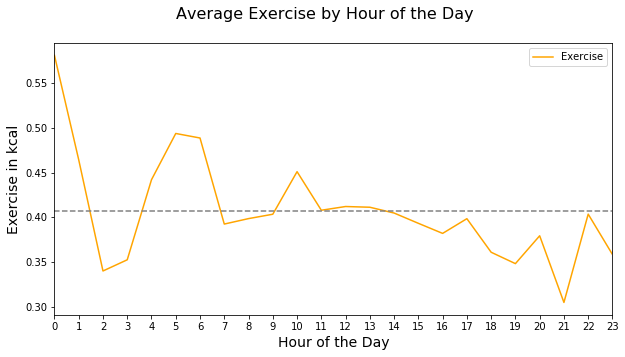

In [35]:
exercise_hour = exercise_applewatch.groupby(['hour'])['value'].mean().reset_index(name = 'Exercise')
exercise_hour.plot(x ='hour', figsize = [10,5], kind = "line", color='orange')
n_groups = len(exercise_hour)
index = np.arange(n_groups)
plt.suptitle('Average Exercise by Hour of the Day', fontsize=16)
hour_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
plt.xticks(index, hour_labels)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Exercise in kcal', fontsize=14)
plt.axhline(0.406648, color='grey', linestyle='--')

### Inference: 
Looking at the graph, I find it quite unsettling that my peak active time is around midnight which drops suddenly around 1/ 2 am which is when I remove my watch. 4-6 am is the time I am sleeping thus exercise should be low. It is also possible that the zero here starts at noon, which makes more sense. 

### Average Exercise by Day of Week

(0.38, 0.43)

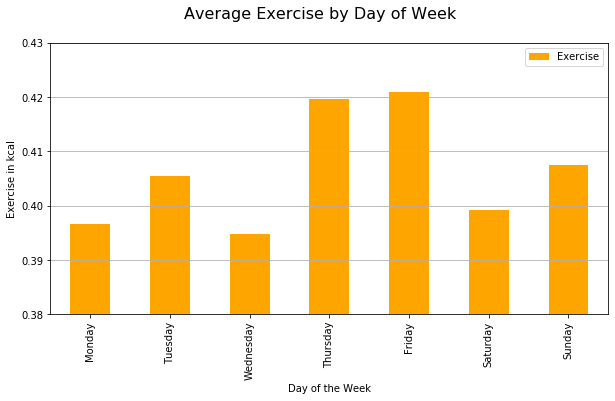

In [36]:
exercise_dow = exercise_applewatch.groupby(['dow'])['value'].mean().reset_index(name = 'Exercise')
ax = exercise_dow.plot(kind='bar', x='dow', figsize=[10,5], color='orange')
n_groups = len(exercise_dow)
index = np.arange(n_groups)
opacity = 0.75
ax.yaxis.grid(True)
plt.suptitle('Average Exercise by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels)
plt.xlabel('Day of the Week')
plt.ylabel('Exercise in kcal')
plt.ylim(0.38,0.430)

### Inference: 
Looking at the graph, this seems pretty accurate. I have a very light schedule on Monday and Wednesday thus prefer to work from home in most cases and have classes all over the campus on Tuesdays and Thursdays. I usually attend events on Fridays thus the activity is the highest. If I stay at home the whole day on Saturday, I feel like getting out on Sunday and thus the activity is pretty high for that day. 

### Interactive Crossfilter
Crossfilter organizes data based on certain filters, and can be aggregated by group. Here three graphs have been rendered against mean exercise in kcal and which are grouped by day of the week. 
* This interactive visualization has been made using the library altair
* Interactive Crossfilter documentation reference: https://altair-viz.github.io/gallery/interactive_layered_crossfilter.html
* Aggregate Transformation documentation: https://altair-viz.github.io/user_guide/transform.html#aggregate-transforms

#### How it works? 
The dataset has been grouped by day of week, and the selecting a rectangle area on one of the three linked graphs shows the implications on the others.

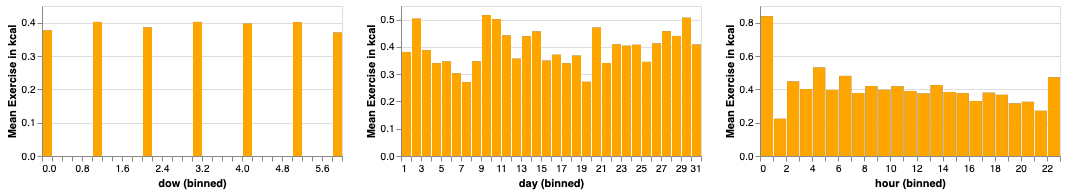

In [37]:
brush = alt.selection(type='interval', encodings=['x'])
data=exercise_applewatch.sample(5000)

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart(data).mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=35)),
    y=alt.Y('value', aggregate='average', type='quantitative', title = 'Mean Exercise in kcal')
#     y='average(value)'
).properties(
    width=300,
    height=150
)

# blue background with selection
background = base.add_selection(brush)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('orange')
).transform_filter(brush)

# layer the two charts & repeat
alt.layer(
    background, 
    highlight, 
    data=exercise_applewatch.sample(5000)
).transform_aggregate(
    groupby = ['dow']
).repeat(
    column=["dow", "day", "hour"])

### Inference: 
Selecting a rectangle patch on the first graph, i.e. day of the week shows me days of the month which also were the same day in the week and the corresponding exercise over the day. This is very helpful to get an overall idea of my exercise levels, when viewed from multiple points at once. 
***

## How consistent has my menstrual cycle been over the months/ years? ❣️  
The data collection method is through self input in the Clue App which is then synced with the Apple HealthKit

In [55]:
menstruation = pd.read_csv("data/MenstrualFlow.csv")

In [56]:
menstruation['startDate'] = pd.to_datetime(menstruation['startDate'])
menstruation['month'] = menstruation['startDate'].map(get_month)
menstruation.tail()

sourceName  sourceVersion  device           type  unit  \
5415       Clue          13853     NaN  MenstrualFlow   NaN   
5416       Clue          13853     NaN  MenstrualFlow   NaN   
5417       Clue          13853     NaN  MenstrualFlow   NaN   
5418       Clue          13853     NaN  MenstrualFlow   NaN   
5419       Clue          13853     NaN  MenstrualFlow   NaN   

                   creationDate                 startDate  \
5415  2019-10-10 09:06:29 -0400 2019-10-08 00:00:00-04:00   
5416  2019-10-10 09:06:33 -0400 2019-10-08 00:00:00-04:00   
5417  2019-10-11 08:03:44 -0400 2019-10-08 00:00:00-04:00   
5418  2019-10-11 08:03:45 -0400 2019-10-09 00:00:00-04:00   
5419  2019-10-11 08:03:45 -0400 2019-10-10 00:00:00-04:00   

                        endDate                               value    month  
5415  2019-10-08 00:00:00 -0400   HKCategoryValueMenstrualFlowHeavy  2019-10  
5416  2019-10-08 00:00:00 -0400   HKCategoryValueMenstrualFlowHeavy  2019-10  
5417  2019-10-08 00:00:00 -0400   HKCategoryValueMenstrualFlowHeavy  2019-10  
5418  2019-10-09 00:00:00 -0400  HKCategoryValueMenstrualFlowMedium  2019-10  
5419  2019-10-10 00:00:00 -0400   HKCategoryValueMenstrualFlowLight  2019-10

In [57]:
menstruation['value'].unique()

array(['HKCategoryValueMenstrualFlowMedium',
       'HKCategoryValueMenstrualFlowLight',
       'HKCategoryValueMenstrualFlowHeavy'], dtype=object)

Mapping String values in the 'value' column of the dataframe to numeric values, 1 being a light flow, 2 medium and 3 being heavy.

In [60]:
menstruation['value'] = menstruation['value'].map({'HKCategoryValueMenstrualFlowLight': 1,'HKCategoryValueMenstrualFlowMedium': 2, 'HKCategoryValueMenstrualFlowHeavy':3})
menstruation.tail()

sourceName  sourceVersion  device           type  unit  \
5415       Clue          13853     NaN  MenstrualFlow   NaN   
5416       Clue          13853     NaN  MenstrualFlow   NaN   
5417       Clue          13853     NaN  MenstrualFlow   NaN   
5418       Clue          13853     NaN  MenstrualFlow   NaN   
5419       Clue          13853     NaN  MenstrualFlow   NaN   

                   creationDate                 startDate  \
5415  2019-10-10 09:06:29 -0400 2019-10-08 00:00:00-04:00   
5416  2019-10-10 09:06:33 -0400 2019-10-08 00:00:00-04:00   
5417  2019-10-11 08:03:44 -0400 2019-10-08 00:00:00-04:00   
5418  2019-10-11 08:03:45 -0400 2019-10-09 00:00:00-04:00   
5419  2019-10-11 08:03:45 -0400 2019-10-10 00:00:00-04:00   

                        endDate  value    month  
5415  2019-10-08 00:00:00 -0400      3  2019-10  
5416  2019-10-08 00:00:00 -0400      3  2019-10  
5417  2019-10-08 00:00:00 -0400      3  2019-10  
5418  2019-10-09 00:00:00 -0400      2  2019-10  
5419  2019-10-10 00:00:00 -0400      1  2019-10

In [61]:
menstruation_month = menstruation.groupby(['month'])['value'].mean().reset_index(name = 'MenstrualFlow')
menstruation_month.head()

month  MenstrualFlow
0  2017-03       1.343750
1  2017-04       1.802469
2  2017-05       2.000000
3  2017-06       1.751825
4  2017-07       1.396226

### Bar graph of Menstruation over the months 
A grey dotted horizontal line shows the average menstrual flow of the whole data, to give a better idea of when the average is being exceeded, met or falling short of. 

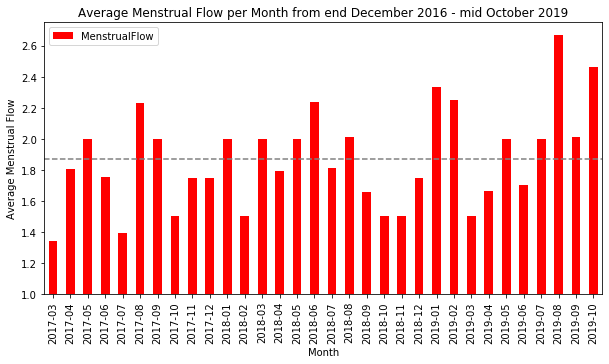

In [66]:
menstruation_month.plot(x ='month', y = 'MenstrualFlow', color ='red', kind = 'bar', figsize = [10,5])
# menstruation_month.plot(x ='month', y = 'value', figsize = [10,5], kind = "line")
n_groups = len(menstruation_month)
index = np.arange(n_groups)
opacity = 0.75
plt.title('Average Menstrual Flow per Month from end December 2016 - mid October 2019')
plt.xlabel("Month")
value_labels = ['Very Light', 'Light', 'Medium', 'Heavy', 'Medium', 'Heavy'] #vertical labels are not rendered
plt.ylabel("Average Menstrual Flow")
plt.ylim(1.0,2.75)
plt.axhline(1.870743, color='grey', linestyle='--') #horizontal line to display the average value
plt.show()

### Inference: 
My menstruation cycle seems to be a sin wave with its ups and downs. There are quite a few months when my average menstrual cycle flow is not reached. the heaviest flow was in August 2019.

### Line graph of menstruation over the months
Iterating over the previous graph, I thought that I would get a better idea of my cycle fluctuations using a line graph.

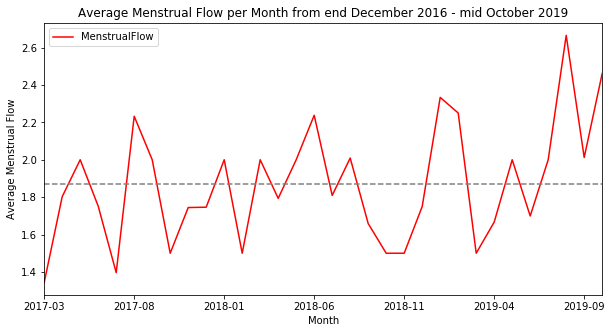

In [63]:
menstruation_month.plot(x ='month', y = 'MenstrualFlow', color ='red', kind = 'line', figsize = [10,5])
plt.title('Average Menstrual Flow per Month from end December 2016 - mid October 2019')
plt.xlabel("Month")
value_labels = ['Very Light', 'Light', 'Medium', 'Heavy', 'Medium', 'Heavy']
plt.ylabel("Average Menstrual Flow")
plt.axhline(1.870743, color='grey', linestyle='--')
plt.show()

### Inference: 
The individual months could not be plotted here, but this shows a trend over the years better. In the beginning of winter 2018, the flow was a bit low, probably because of the change of season or due to too much stress from homeworks. The flow has become much more than before in the recent months.

## Is there a relation between heavy menstrual flow and step count? 👣❣️
A heavy menstrual flow implies more cramps and on those days, I try to avoid walking around because of the pain. Thus, I wanted to see if the data can prove it.
### Description of the graph:
This interactive graph has a tooltip which shows the month, step count and the average menstrual flow for that month. The bar height describes the stepCount by month, while the color of the bars corresponds to the average menstrual flow for that month, a darker color signifying a heavier flow.

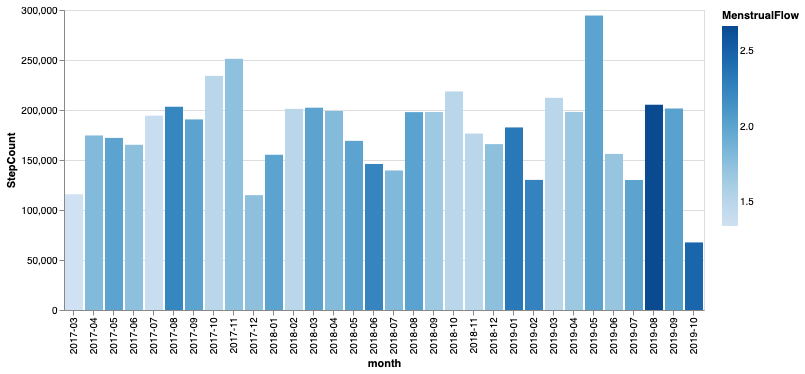

In [25]:
mergedFinal = pd.merge(steps_month, menstruation_month, on = 'month')
source=mergedFinal
alt.Chart(source).mark_bar().encode(
    x='month:O',
    y= alt.Y('StepCount:Q', stack=None),
    color='MenstrualFlow',
    tooltip = ["month", "StepCount", "MenstrualFlow"]
)

### Inference
I anticipated that darker bars will correspond to a lower step count. Although this is true for most cases, this is not necessarily so for a few months for instance Aug 2017 and May 2019. Another point to observe here is that a menstrual cycle lasts for 4-5 days while the month has multiple days. A more accurate way to do this would have been to analyse the stepcount of only those days when the menstrual cycle was going on. 

<h2>Resources</h2>
    <ul>
    <li>Tutorial reference for parsing Apple Health Data: <a href ="http://www.markwk.com/data-analysis-for-apple-health.html">http://www.markwk.com/data-analysis-for-apple-health.html</a></li>
    <li>Apple Health Data Parser code: <a href = "https://github.com/markwk/qs_ledger/blob/master/apple_health/apple-health-data-parser.py">https://github.com/markwk/qs_ledger/blob/master/apple_health/apple-health-data-parser.py </a></li>
    <li>Inspiration: Apple Health Processor: <a href = "https://github.com/markwk/qs_ledger/blob/master/apple_health/apple_health_data_processor.ipynb">https://github.com/markwk/qs_ledger/blob/master/apple_health/apple_health_data_processor.ipynb</a></li>
    <li>Replacing strings with numbers in python for data analysis: <a href = "https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/">https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/</a></li>
</ul>

## Appendix

Merge menstruation and steps dataframe. 

In [26]:
menstruation_df = menstruation[['value', 'month']]
steps_df = steps_iphone[['value', 'month']]
merged = pd.merge(menstruation_df, steps_df, on ='month')
merged.head()

value_x    month  value_y
0        2  2017-03        8
1        2  2017-03       34
2        2  2017-03       26
3        2  2017-03       11
4        2  2017-03      128

Further performed operations on the merged dataframes. Which later on led to erronous results while plotting the graph as can be seen further while scrolling.

In [27]:
merged1 = merged.groupby(['month'])['value_x'].mean().reset_index(name = 'MenstrualFlow')
merged1.head()

month  MenstrualFlow
0  2017-03       1.343750
1  2017-04       1.802469
2  2017-05       2.000000
3  2017-06       1.751825
4  2017-07       1.396226

In [28]:
merged2 = merged.groupby(['month'])['value_y'].sum().reset_index(name = 'StepCount')
merged2.describe()

StepCount
count  3.200000e+01
mean   2.989910e+07
std    2.307378e+07
min    3.514472e+06
25%    1.767468e+07
50%    2.280144e+07
75%    2.983657e+07
max    9.873102e+07

Merged the two dataframes again.

In [29]:
mergedFinal = pd.merge(merged1, merged2, on = 'month')
mergedFinal.describe()

MenstrualFlow     StepCount
count      32.000000  3.200000e+01
mean        1.870743  2.989910e+07
std         0.318294  2.307378e+07
min         1.343750  3.514472e+06
25%         1.664634  1.767468e+07
50%         1.805840  2.280144e+07
75%         2.002294  2.983657e+07
max         2.665281  9.873102e+07

Error: The stepcount of June to Aug 2019 seems too high. Seems that apple watch and iphone data both are combined which is throwing this error. Previously, iphone data has been isolated carefully. 

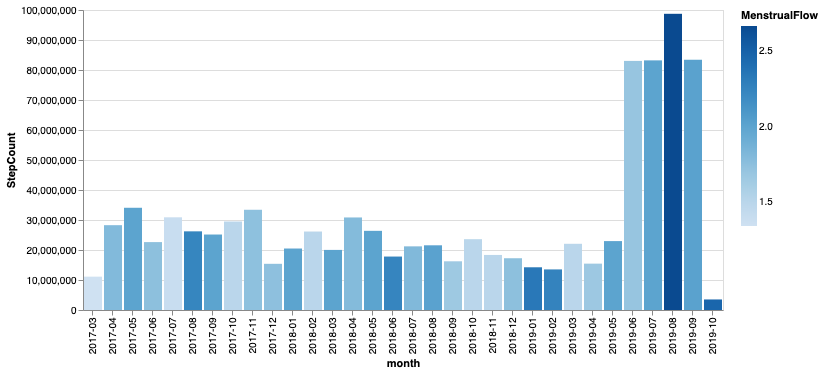

In [30]:
source=mergedFinal
alt.Chart(source).mark_bar().encode(
    x='month:O',
    y= alt.Y('StepCount:Q', stack=None),
   color='MenstrualFlow'
)

Interactive Crossfilter that did not work 

In [31]:
# Brush for selection
brush = alt.selection(type='interval')
source=mergedFinal

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x= alt.X('month', type='quantitative'),
    y= alt.Y('StepCount', type='quantitative'),
    color=alt.condition(brush, 'Cylinders:O', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
month = ranked_text.encode(text='month').properties(title='Horsepower')
StepCount = ranked_text.encode(text='step count').properties(title='MPG')
MenstrualFlow = ranked_text.encode(text='Menstrual flow').properties(title='Origin')
text = alt.hconcat(month, StepCount, MenstrualFlow) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

ValueError: step count encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.HConcatChart(...)